In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style='darkgrid', font_scale=1.5)

In [177]:
data = pd.read_excel('lab11data.xlsx')

In [178]:
## calib

lambdas = np.array(data.iloc[0:29, 0])
phis = np.array(data.iloc[0:29, 1])

plf = np.polyfit(phis, lambdas, 2, full= True)
x_new = np.linspace(2150, 3000, 250)
y_new = np.polyval(plf[0], x_new)
err = np.sqrt(plf[1])
err

phi_data = [2200, 2270, 2340, 2410, 2480, 2550, 2620, 2690, 2760, 2900]
lambda_data = np.polyval(plf[0], phi_data)
lambda_data

array([5337.7487067 , 5435.42539216, 5545.1481173 , 5666.91688212,
       5800.73168663, 5946.59253083, 6104.4994147 , 6274.45233826,
       6456.45130151, 6856.58734705])

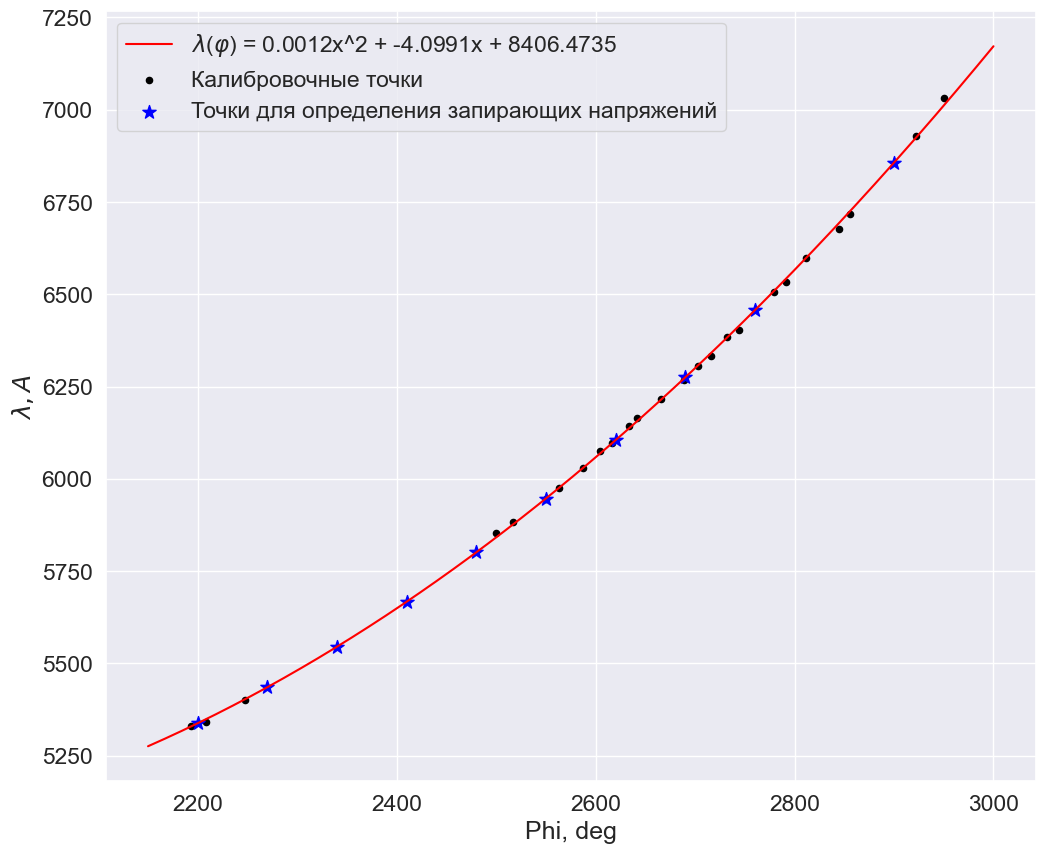

In [179]:
plt.figure(figsize= (12,10))
plt.plot(x_new, y_new, c = 'red', label = f'$\lambda$($\\varphi$) = {plf[0][0]:.4f}x^2 + {plf[0][1]:.4f}x + {plf[0][2]:.4f}')
plt.scatter(phis, lambdas, c= 'black', s = 20, label = 'Калибровочные точки')
plt.scatter(phi_data, lambda_data, c = 'blue', marker='*', s = 100, label = 'Точки для определения запирающих напряжений')
plt.legend()
plt.xlabel('Phi, deg')
plt.ylabel('$\lambda, A$')
plt.savefig('plot1.png')

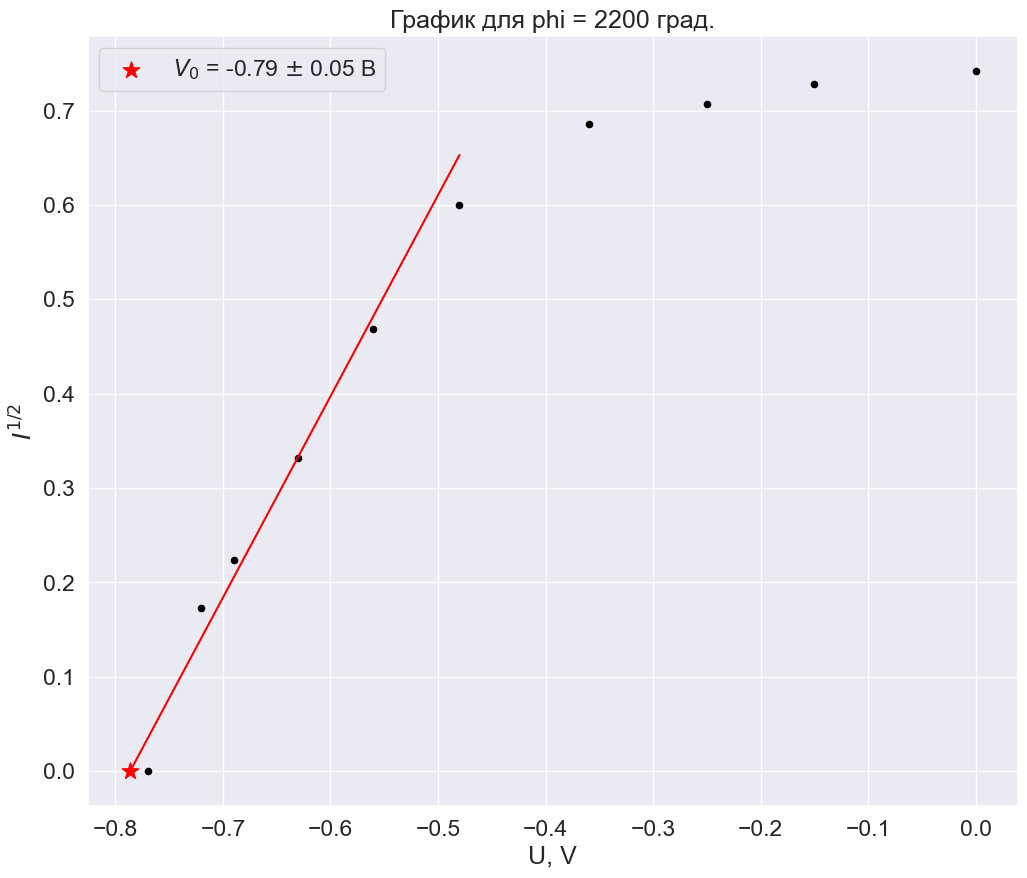

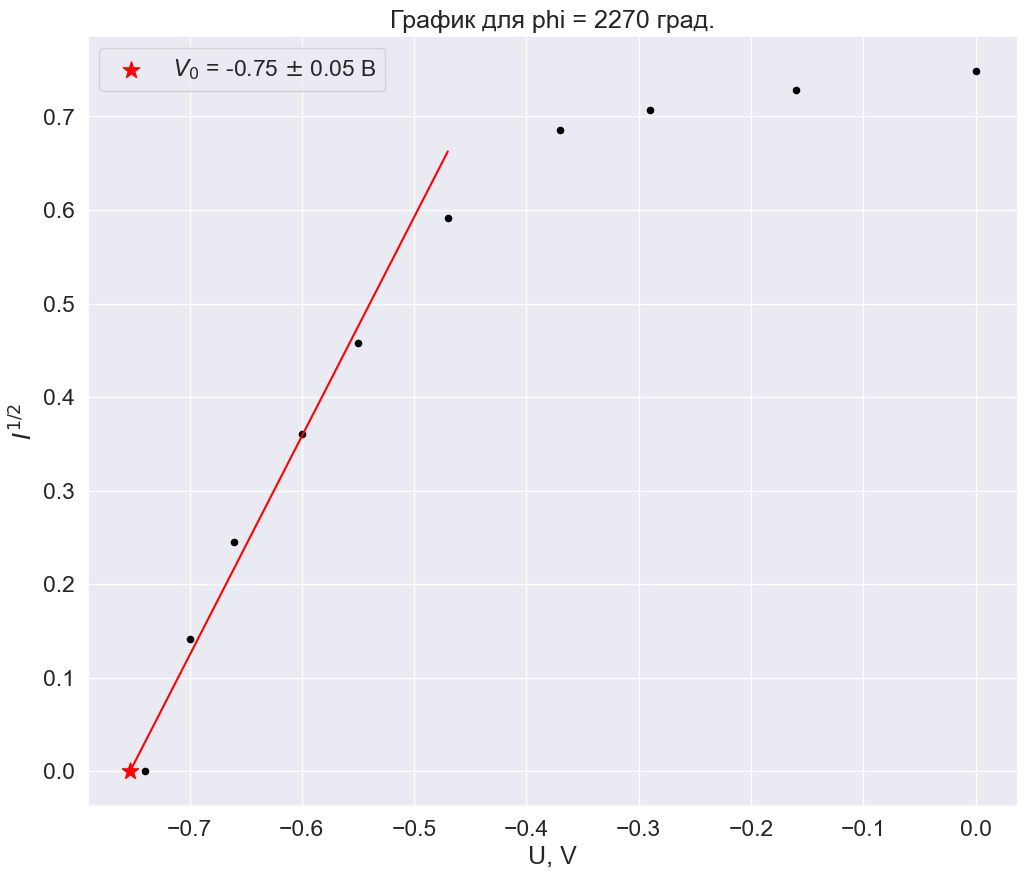

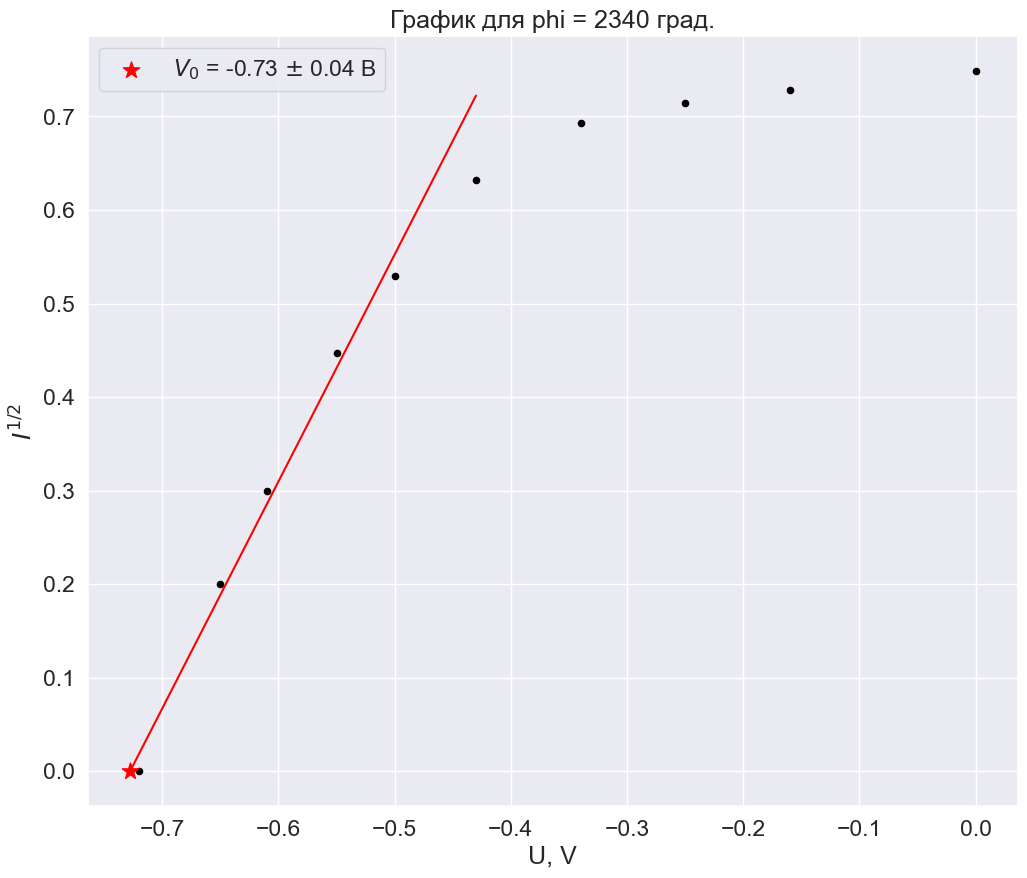

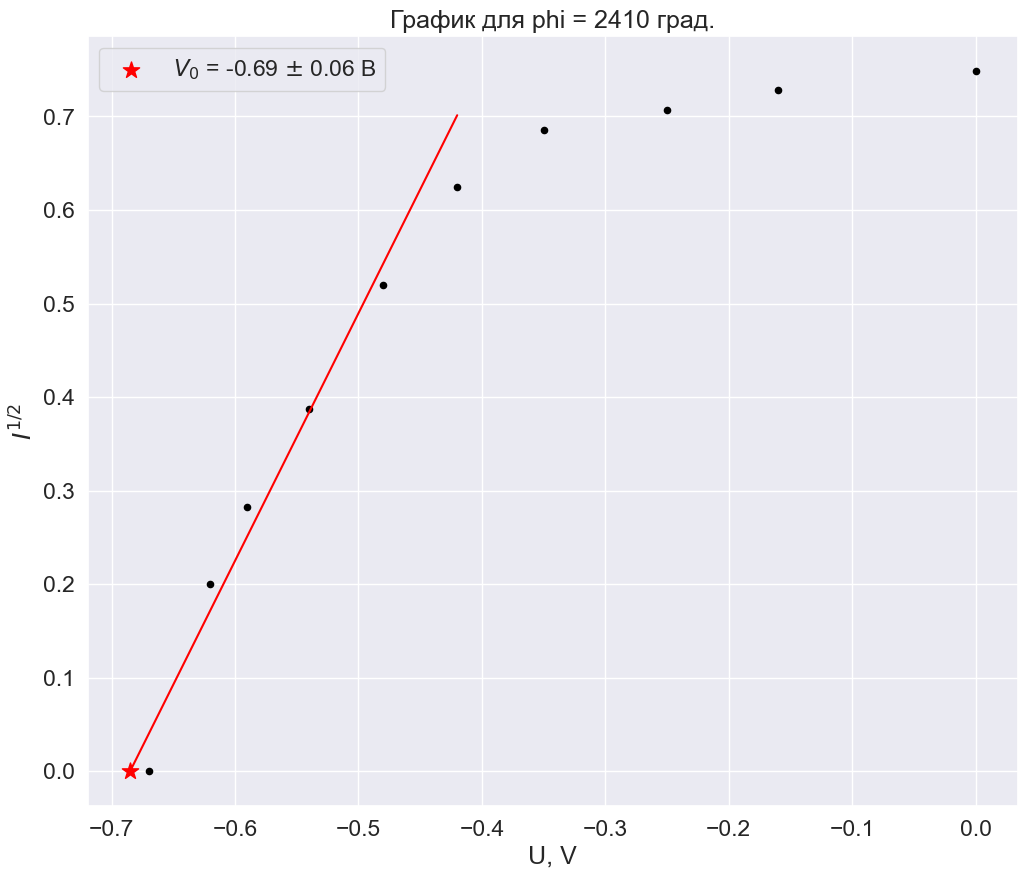

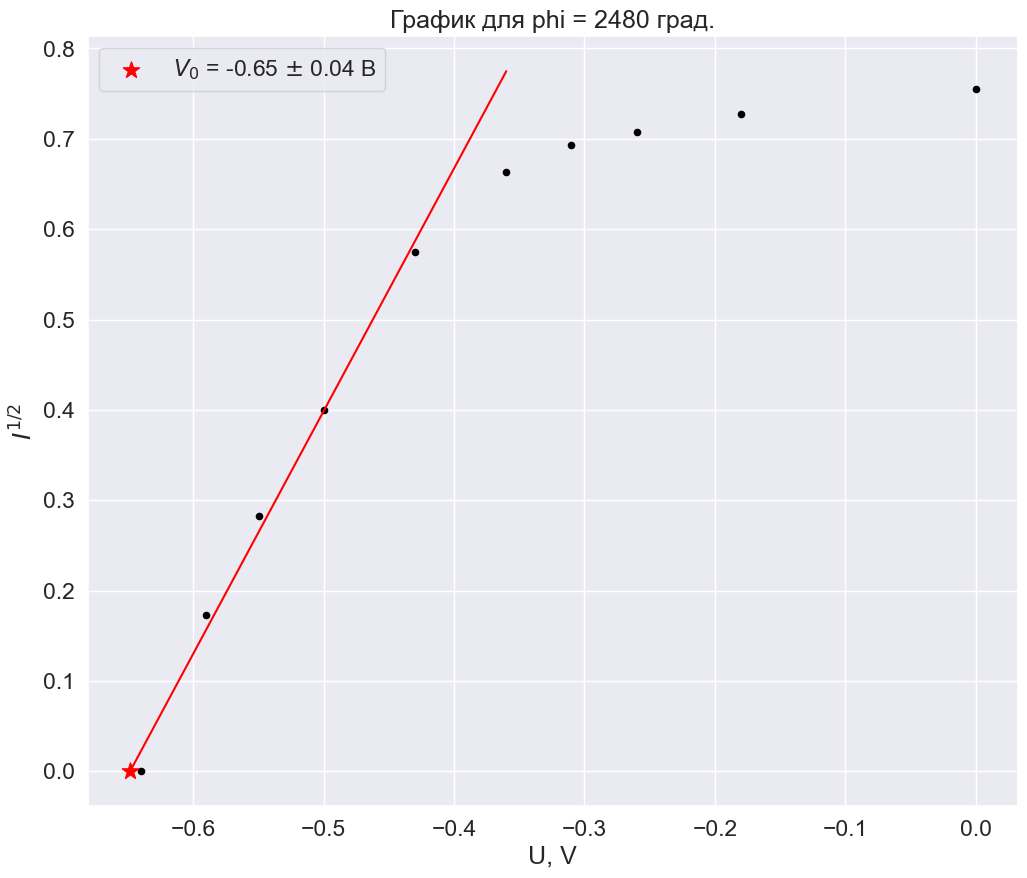

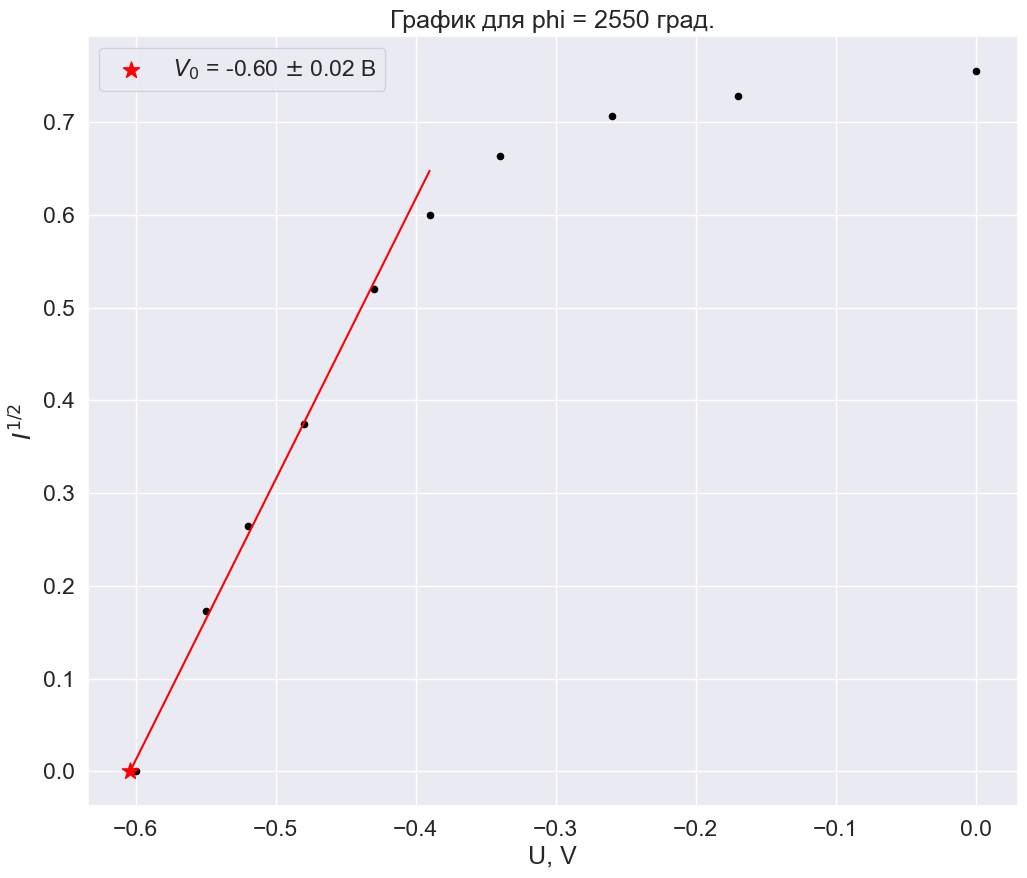

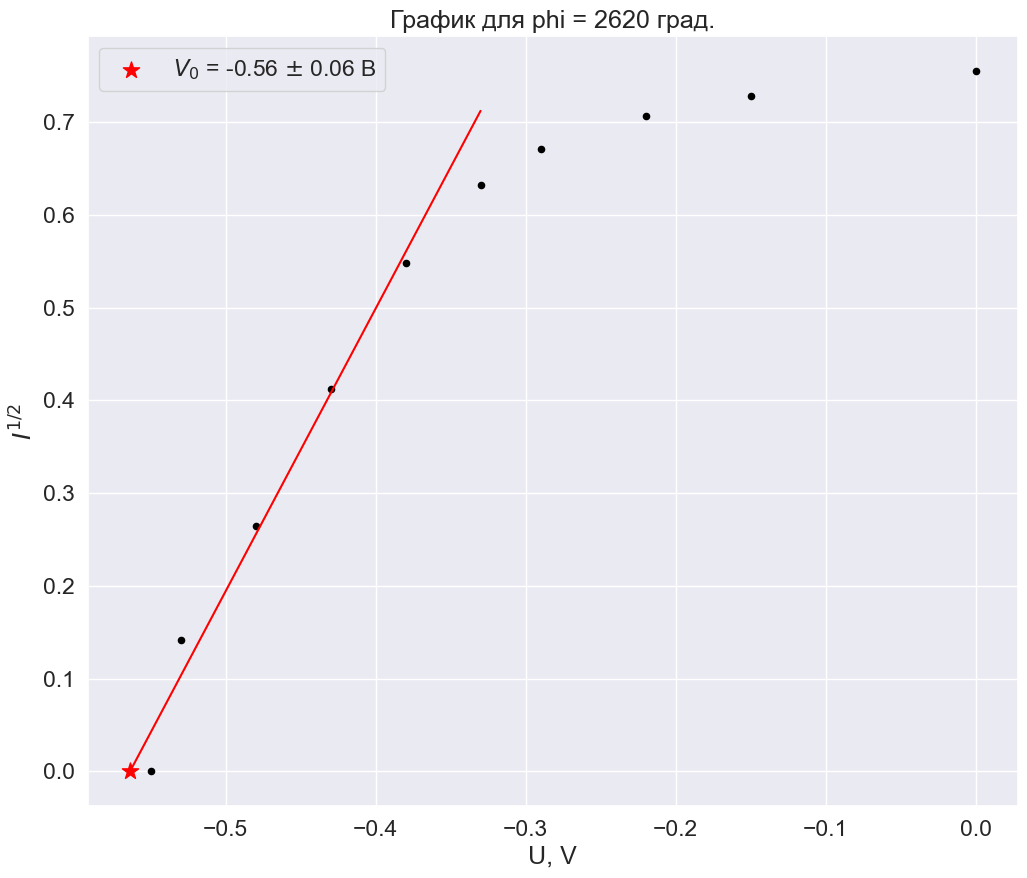

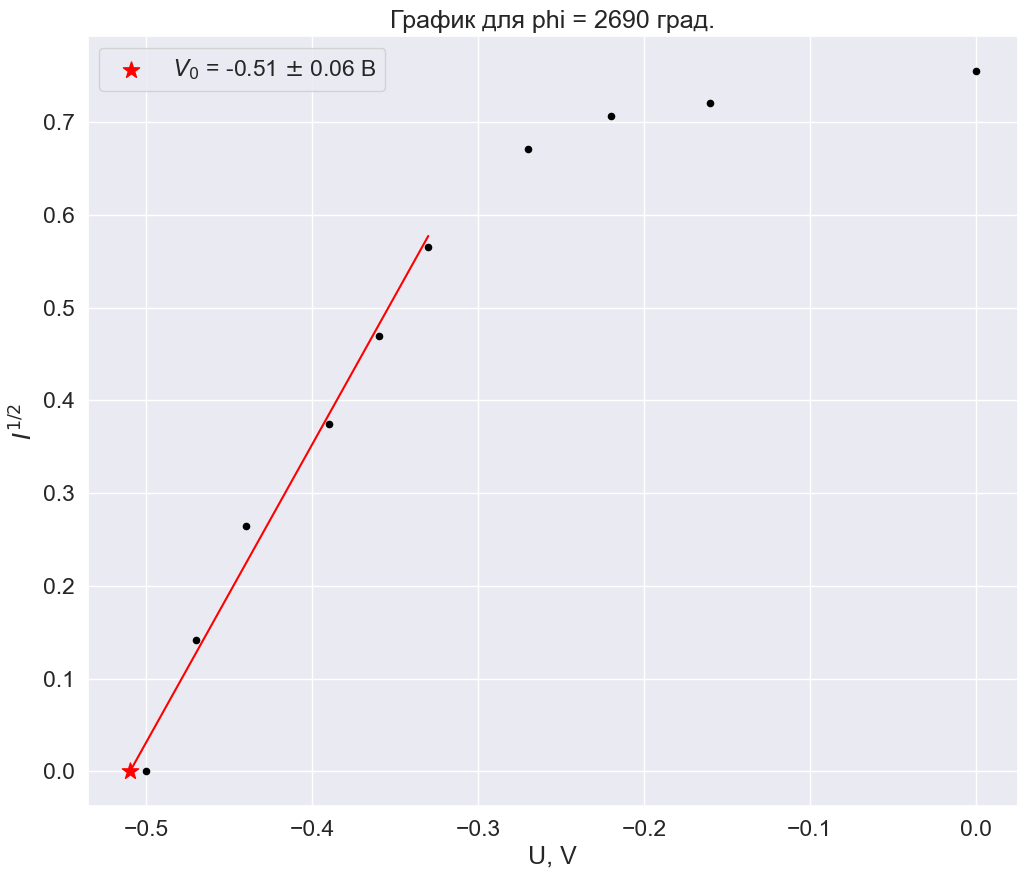

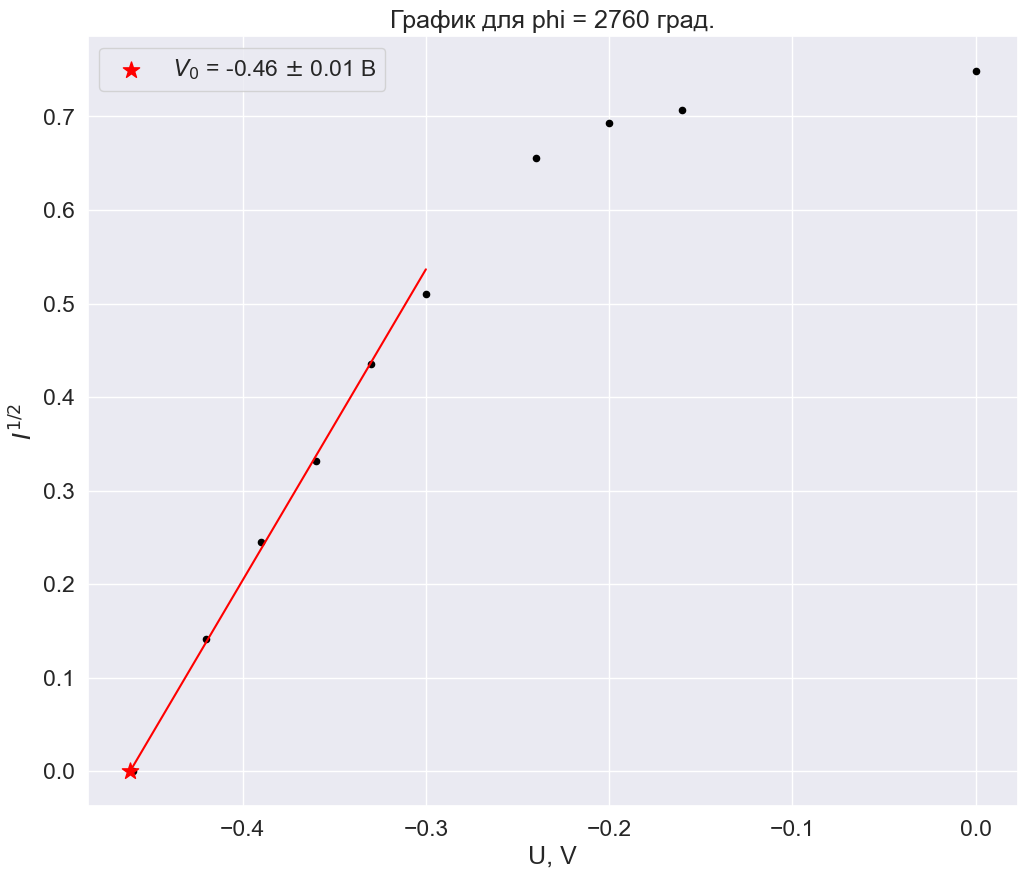

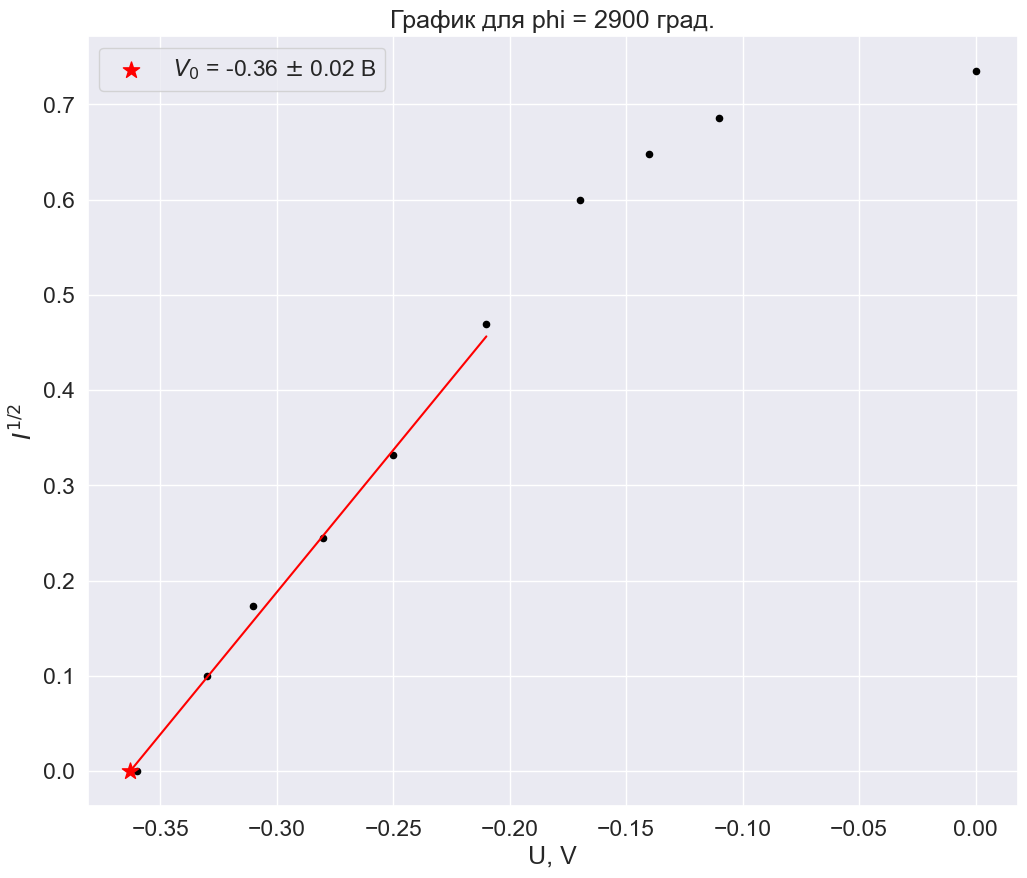

In [302]:
zeros = []
errors = []

for i in range(len(phi_data)):
    U1 = np.array(data.iloc[1:11, 4 + i*2], dtype= float)
    I1 = np.array(data.iloc[1:11, 5 + i*2], dtype= float)
    I1 = np.sqrt(I1)

    plf1 = np.polyfit(U1[:5], I1[:5], 1, full=True)
    Pn1 = plf1[0]
    err1 = np.sqrt(plf1[1])

    zero1 = np.roots(Pn1)[0]
    zeros.append(zero1)
    U1_new = np.array([zero1, U1[5]])
    I1_new = np.polyval(Pn1, U1_new)

    plt.figure(figsize= (12,10))
    plt.scatter(U1, I1, c='black', s = 20)
    plt.scatter(zero1, 0, s = 150, c = 'red', marker = '*', label = f'$V_0$ = {zero1:.2f} $\pm$ {err1[0]:.2f} В')
    plt.plot(U1_new, I1_new, c= 'red')
    plt.legend(loc = 'best')
    plt.xlabel('U, V')
    plt.ylabel('$I^{1/2}$')
    plt.title(f'График для phi = {phi_data[i]} град.')
    plt.savefig(f'plot_zero{i+1}.png')

In [313]:
c = 299792458
lambda_data_si = lambda_data * 10**(-10)
omegas = 2 * np.pi * c / (lambda_data_si)
zeros = np.abs(np.array(zeros))

plf_itog = np.polyfit(omegas, zeros, 1, full = True)
Pn = plf_itog[0]
err = np.sqrt(plf_itog[1] + (0.8*0.07)**2) 

zero = np.roots(Pn)[0]
omegas_new = np.array((zero, omegas[0]))
zeros_new = np.polyval(Pn, omegas_new)
err

array([0.05919097])

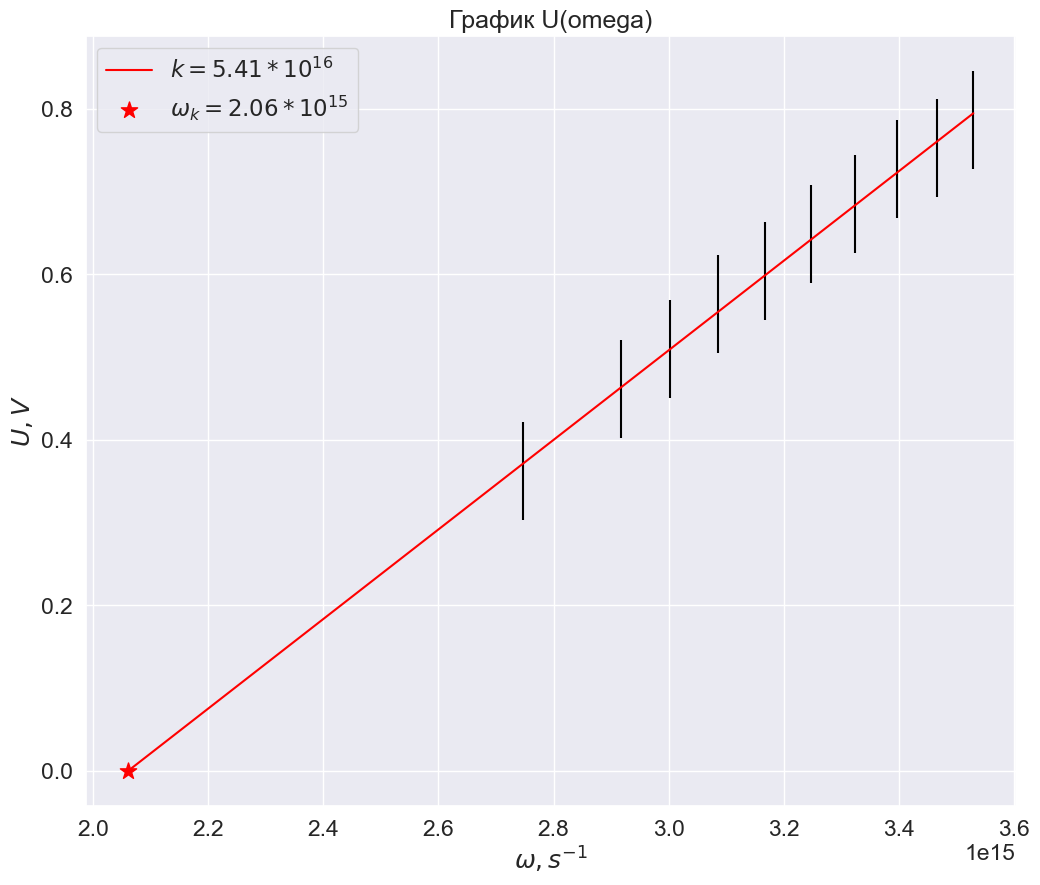

In [315]:

plt.figure(figsize= (12,10))
plt.errorbar(omegas, zeros, err, c = 'black', fmt = 'none')
plt.plot(omegas_new, zeros_new, c = 'red', label = f'$k = {Pn[0] * 10**(16):.2f} * 10^{{16}}$')
plt.scatter(zero, 0, c= 'red', s = 150, marker ='*', label = f'$\omega_k = {zero/(10**(15)):.2f} * 10^{{15}}$')
plt.legend(loc = 'best')
plt.xlabel('$\omega, s^{ -1}$')
plt.ylabel('$U, V$')
plt.title(f'График U(omega)')
plt.savefig('plot_itog.png')